<img src="img\cover.png">

# LEZIONE 4


12 Giugno 2018

<img src="img/python.png">

## Artificial neurons

Trying to understand how the biological brain works to design artificial intelligence, Warren McCullock and Walter Pitts published the first concept of a simplified brain cell, the so-called McCullock-Pitts (MCP) neuron, in 1943 (W. S. McCulloch and W. Pitts. A Logical Calculus of the Ideas Immanent in Nervous Activity. The bulletin of mathematical biophysics, 5(4):115–133, 1943). Neurons are interconnected nerve cells in the brain that are involved in the processing and transmitting of chemical and electrical signals, which is illustrated in the following figure:

<img src="img/neurone.png">

McCullock and Pitts described such a nerve cell as a simple logic gate with binary outputs; multiple signals arrive at the dendrites, are then integrated into the cell body, and, if the accumulated signal exceeds a certain threshold, an output signal is generated that will be passed on by the axon.

Only a few years later, Frank Rosenblatt published the first concept of the perceptron learning rule based on the MCP neuron model (F. Rosenblatt, The Perceptron, a Perceiving and Recognizing Automaton. Cornell Aeronautical Laboratory, 1957). With his perceptron rule, Rosenblatt proposed an algorithm that would automatically learn the optimal weight coefficients that are then multiplied with the input features in order to make the decision of whether a neuron fires or not. In the context of supervised learning and classification, such an algorithm could then be used to predict if a sample belonged to one class or the other.


### Learning perceptron for classification

More formally, we can pose this problem as a binary classification task where we refer to our two classes as 1 (positive class) and -1 (negative class) for simplicity. 

We can then define an activation function $\phi(z)$ that takes a linear combination of certain input values $x$ and a corresponding weight vector $w$, where $z$ is the so-called net input ($z = w_1 x_1 + ... + w_m x_m$):

$$\vec{w} = \left[
    \begin{array}{c}
      w_1 \\
      w_2 \\
      .   \\
      w_m
    \end{array}
  \right],\quad
  \vec{x} = \left[\begin{array}{c}
      x_1 \\
      x_2 \\
      .   \\
      x_m
    \end{array}
  \right]$$



Now, if the activation of a particular sample $x^{(i)}$, that is, the output of $\phi(z)$, is greater than a defined threshold $\theta$, we predict class 1 and class -1, otherwise, in the perceptron algorithm, the activation function $\phi()$ is a simple unit step function, which is sometimes also called the Heaviside step function:

$$ \phi(z) =
  \begin{cases}
    1       & \quad \text{if } z \ge \theta\\
    -1  & \quad \text{otherwise }
  \end{cases}
$$




For simplicity, we can bring the threshold $\theta$ to the left side of “the equation and define a weight-zero as $w_0 = -\theta$ and $x_0=1$, so that we write  in a more compact form

$$ z = w_0 x_0 + w_1 x_1 + ... + w_m x_m = \vec{w}^{T} \vec{x}$$

and

$$ \phi(z) =
  \begin{cases}
    1       & \quad \text{if } z \ge 0\\
    -1  & \quad \text{otherwise }
  \end{cases}
$$

Example:
<img src="img\rowcol.png">

The following figure illustrates how the net input  is squashed into a binary output (-1 or 1) by the activation function of the perceptron (left subfigure) and how it can be used to discriminate between two linearly separable classes (right subfigure):

<img src="img/attivazione.png">

The whole idea behind the MCP neuron and Rosenblatt's thresholded perceptron model is to use a reductionist approach to mimic how a single neuron in the brain works: it either fires or it doesn't. Thus, Rosenblatt's initial perceptron rule is fairly simple and can be summarized by the following steps:

1. Initialize the weights to 0 or small random numbers.
2. For each training sample $x^{(i)}$ perform the following steps:
 1. Compute the output value $\hat{y} = \phi(z)$.
 2. Update the weights.

Here, the output value is the class label predicted by the unit step function that we defined earlier, and the simultaneous update of each weight $w_j$ in the weight vector $\vec{w}$ can be more formally written as:

$$w_j := w_j + \Delta w_j$$

The value of $\Delta w_j$, which is used to update the weight $w_j", is calculated by the perceptron learning rule:

$$\Delta w_j = \eta \left(y^{(i)} -\hat{y}^{(i)} \right) x_j^{(i)}$$

Where $\eta$ is the learning rate (a constant between 0.0 and 1.0), $y^{(i)}$ is the true class label of the i-th training sample, and $\hat{y}^{(i)}$ is the predicted class label. It is important to note that all weights in the weight vector are being updated simultaneously, which means that we don't recompute the $\hat(y)^{(i)}$ before all of the weights $\Delta w_j$ were updated.

Concretely, for a 2D dataset, we would write the update as follows:

$$\Delta w_0 = \eta \left(y^{(i)} -\text{output}^{(i)} \right) $$

$$\Delta w_1 = \eta \left(y^{(i)} -\text{output}^{(i)} \right) x_1^{(i)}$$

$$\Delta w_2 = \eta \left(y^{(i)} -\text{output}^{(i)} \right) x_2^{(i)}$$

Before we implement the perceptron rule in Python, let us make a simple thought experiment to illustrate how beautifully simple this learning rule really is. In the two scenarios where the perceptron predicts the class label correctly, the weights remain unchanged:

$$\Delta w_j = \eta \left(-1^{(i)} --1^{(i)} \right) x_j^{(i)} = 0$$

$$\Delta w_j = \eta \left(1^{(i)} -1^{(i)} \right) x_j^{(i)} = 0$$

However, in the case of a wrong prediction, the weights are being pushed towards the direction of the positive or negative target class, respectively:

$$\Delta w_j = \eta \left(1^{(i)} --1^{(i)} \right) x_j^{(i)} = 2 \eta x_j^{(i)}$$

$$\Delta w_j = \eta \left(-1^{(i)} -1^{(i)} \right) x_j^{(i)} = -2 \eta x_j^{(i)}$$

It is important to note that the convergence of the perceptron is only guaranteed if the two classes are linearly separable and the learning rate is sufficiently small. If the two classes can't be separated by a linear decision boundary, we can set a maximum number of passes over the training dataset (epochs) and/or a threshold for the number of tolerated misclassifications—the perceptron would never stop updating the weights otherwise: 

<img src="img/separability.png">

Now, before we jump into the implementation in the next section, let us summarize what we just learned in a simple figure that illustrates the general concept of the perceptron: 

<img src="img/learning.png">

The preceding figure illustrates how the perceptron receives the inputs of a sample and combines them with the weights  to compute the net input. The net input is then passed on to the activation function (here: the unit step function), which generates a binary output -1 or +1: the predicted class label of the sample. During the learning phase, this output is used to calculate the error of the prediction and update the weights.

## Implementing a perceptron learning algorithm in Python

In [1]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                #for i in range(1, len(self.w_)):
                #    self.w_[i] += update * xi[i]
                    
                    
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Test with Iris Dataset

To test our perceptron implementation, we will load the two flower classes Setosa and Versicolor from the Iris dataset. Although, the perceptron rule is not restricted to two dimensions, we will only consider the two features sepal length and petal length for visualization purposes. Also, we only chose the two flower classes Setosa and Versicolor for practical reasons. However, the perceptron algorithm can be extended to multi-class classification—for example, through the One-vs.-All technique.

*Note:*

*One-vs.-All (OvA), or sometimes also called One-vs.-Rest (OvR), is a technique, us to extend a binary classifier to multi-class problems. Using OvA, we can train one classifier per class, where the particular class is treated as the positive class and the samples from all other classes are considered as the negative class. If we were to classify a new data sample, we would use our  classifiers, where  is the number of class labels, and assign the class label with the highest confidence to the particular sample. In the case of the perceptron, we would use OvA to choose the class label that is associated with the largest absolute net input value.*

In [3]:
import pandas as pd

df = pd.read_csv('iris.data', header=None)
df.head(110)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


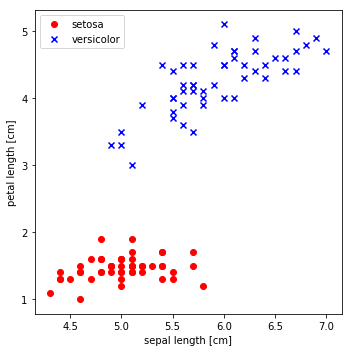

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor (first 100th)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.figure(figsize=(5,5))
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('./images/02_06.png', dpi=300)
plt.show()

### Training...

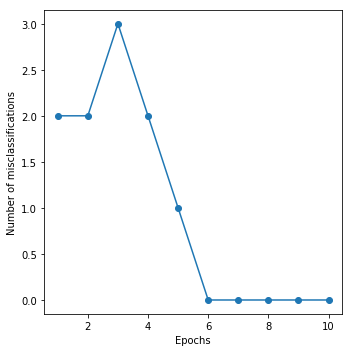

In [7]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.figure(figsize=(5,5))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

plt.tight_layout()
# plt.savefig('./perceptron_1.png', dpi=300)
plt.show()

As we can see in the preceding plot, our perceptron already converged after the sixth epoch and should now be able to classify the training samples perfectly. Let us implement a small convenience function to visualize the decision boundaries for 2D datasets:

In [9]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.figure(figsize=(5,5))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

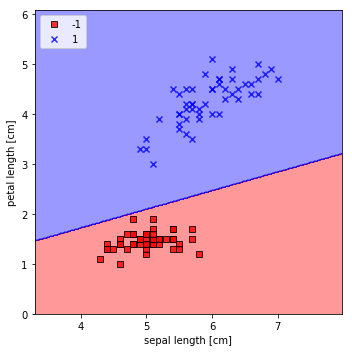

In [10]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()

As we can see in the preceding plot, the perceptron learned a decision boundary that was able to classify all flower samples in the Iris training subset perfectly.

## Training a perceptron via scikit-learn

Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower samples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [11]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

('Class labels:', array([0, 1, 2]))


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [14]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [15]:
y_test.shape

(45,)

In [16]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


In [17]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


In [19]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.figure(figsize=(5,5))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

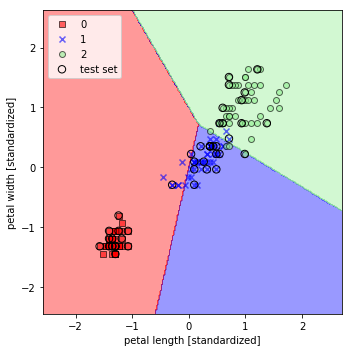

In [20]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/iris_perceptron_scikit.png', dpi=300)
plt.show()

## Multi-layer Perceptron (MLP)

<img src="img/MLP.png">

http://scikit-learn.org/stable/modules/neural_networks_supervised.html


Sometimes looking at the learned coefficients of a neural network can provide insight into the learning behavior. For example if weights look unstructured, maybe some were not used at all, or if very large coefficients exist, maybe regularization was too low or the learning rate too high.

This example shows how to plot some of the first layer weights in a MLPClassifier trained on the MNIST dataset.

The input data consists of 28x28 pixel handwritten digits, leading to 784 features in the dataset. Therefore the first layer weight matrix have the shape (784, hidden_layer_sizes[0]). We can therefore visualize a single column of the weight matrix as a 28x28 pixel image.

To make the example run faster, we use very few hidden units, and train only for a very short time. Training longer would result in weights with a much smoother spatial appearance.

Automatically created module for IPython interactive environment
Iteration 1, loss = 0.32212731
Iteration 2, loss = 0.15738787
Iteration 3, loss = 0.11647274
Iteration 4, loss = 0.09631113
Iteration 5, loss = 0.08074513
Iteration 6, loss = 0.07163224
Iteration 7, loss = 0.06351392
Iteration 8, loss = 0.05694146
Iteration 9, loss = 0.05213487
Iteration 10, loss = 0.04708320


/Users/simone/anaconda/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.985733
Test set score: 0.971000


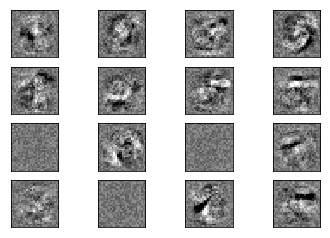

In [21]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

mnist = fetch_mldata("MNIST original")
# rescale the data, use the traditional train/test split
X, y = mnist.data / 255., mnist.target
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

# mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
plt.figure(figsize=(7,7))
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

# Games and search algorithm

Search algorithms appear to solve the problem of adding intelligence to games, but there's a drawback. These algorithms employ a type of search called exhaustive search, which is also known as brute force search. It basically explores the entire search space and tests every possible solution. It means that, in the worst case, we will have to explore all the possible solutions before we get the right solution.

As the games get more complex, we cannot rely on brute force search because the number of possibilities gets enormous. This quickly becomes computationally intractable. In order to solve this problem, we use combinatorial search to solve problems. It refers to a field of study where search algorithms efficiently explore the solution space using heuristics or by reducing the size of the search space. This is very useful in games like Chess or Go. Combinatorial search works efficiently by using pruning strategies. These strategies help it avoid testing all possible solutions by eliminating the ones that are obviously wrong. This helps save time and effort.

## Minimax algorithm

Let's talk about the heuristics that are employed by combinatorial search algorithms. These heuristics are used to speed up the search strategy and the Minimax algorithm is one such strategy used by combinatorial search. When two players are playing against each other, they are basically working towards opposite goals. So each side needs to predict what the opposing player is going to do in order to win the game. Keeping this in mind, Minimax tries to achieve this through strategy. It will try to minimize the function that the opponent is trying to maximize.

As we know, brute forcing the solution is not an option. The computer cannot go through all the possible states and then get the best possible set of moves to win the game. The computer can only optimize the moves based on the current state using a heuristic. The computer constructs a tree and it starts from the bottom. It evaluates which moves would benefit its opponent. Basically, it knows which moves the opponent is going to make based on the premise that the opponent will make the moves that would benefit them the most, and thereby be of the least benefit to the computer. This outcome is one of the terminal nodes of the tree and the computer uses this position to work backwards. Each option that's available to the computer can be assigned a value and it can then pick the highest value to take an action.

## Alpha-Beta pruning

Minimax search is an efficient strategy, but it still ends up exploring parts of the tree that are irrelevant. Let's consider a tree where we are supposed to search for solutions. Once we find an indicator on a node that tells us that the solution does not exist in that sub-tree, there is no need to evaluate that sub-tree. But Minimax search is a bit too conservative, so it ends up exploring that sub-tree.

We need to be smart about it and avoid searching a part of a tree that is not necessary. This process is called pruning and Alpha-Beta pruning is a type of avoidance strategy that is used to avoid searching parts of the tree that do not contain the solution.

The Alpha and Beta parameters in alpha-beta pruning refer to the two bounds that are used during the calculation. These parameters refer to the values that restrict the set of possible solutions. This is based on the section of the tree that has already been explored. Alpha is the maximum lower bound of the number of possible solutions and Beta is the minimum upper bound on the number of possible solutions.

As we discussed earlier, each node can be assigned a value based on the current state. When the algorithm considers any new node as a potential path to the solution, it can work out if the current estimate of the value of the node lies between alpha and beta.

This is how it prunes the search.

## Negamax algorithm

The Negamax algorithm is a variant of Minimax that's frequently used in real world implementations. A two-player game is usually a zero-sum game, which means that one player's loss is equal to another player's gain and vice versa. Negamax uses this property extensively to come up with a strategy to increases its chances of winning the game.

In terms of the game, the value of a given position to the first player is the negation of the value to the second player. Each player looks for a move that will maximize the damage to the opponent. The value resulting from the move should be such that the opponent gets the least value. This works both ways seamlessly, which means that a single method can be used to value the positions. This is where it has an advantage over Minimax in terms of simplicity. Minimax requires that the first player select the move with the maximum value, whereas the second player must select a move with the minimum value. Alpha-beta pruning is used here as well. 

## easyAI library

http://zulko.github.io/easyAI/

EasyAI is an artificial intelligence framework for two-players abstract games such as Tic Tac Toe, Connect 4, Reversi, etc.

It is written in Python and makes it easy to define the mechanisms of a game and play against the computer or solve the game (see A quick example).

Under the hood, the AI is a Negamax algorithm with alpha-beta pruning and transposition tables as described on Wikipedia. It has been written with clarity/simplicity in mind, rather than speed, so it can be slow...

http://zulko.github.io/easyAI/ref.html

### Tris
Tris (Tic-Tac-Toe) is probably one of the most famous games. Let's see how to build a game where the computer can play against the user. This is a minor variant of the Tic-Tac-Toe recipe given in the easyAI library.

Create a new Python file and import the following packages:

```python
from easyAI import TwoPlayersGame, AI_Player, Negamax
from easyAI.Player import Human_Player
```

Define a class that contains all the methods to play the game. Start by defining the players and who starts the game:

```python
class GameController(TwoPlayersGame):
    def __init__(self, players):
        # Define the players
        self.players = players

        # Define who starts the game
        self.nplayer = 1 
```

We will be using a 3x3 board numbered from one to nine row-wise:
The board positions are numbered as follows:

            7 8 9
            
            4 5 6
            
            1 2 3

```python
# Define the board
        self.board = [0] * 9
```

Define a method to compute all the possible moves:

```python
# Define possible moves
    def possible_moves(self):
        return [a + 1 for a, b in enumerate(self.board) if b == 0]
    
```

Define a method to update the board after making a move:

```python
# Make a move
    def make_move(self, move):
        self.board[int(move) - 1] = self.nplayer

```

Define a method to see if somebody has lost the game. We will be checking if somebody has three in a row:
```python
# Does the opponent have three in a line?
    def loss_condition(self):
        possible_combinations = [[1,2,3], [4,5,6], [7,8,9],
            [1,4,7], [2,5,8], [3,6,9], [1,5,9], [3,5,7]]

        return any([all([(self.board[i-1] == self.nopponent)
                for i in combination]) for combination in possible_combinations]) 
```

Check if the game is over using the loss_condition method: 
```python
# Check if the game is over
    def is_over(self):
        return (self.possible_moves() == []) or self.loss_condition() 
```

Define a method to show the current progress:
```python
# Show current position
    def show(self):
        print('\n'+'\n'.join([' '.join([['.', 'O', 'X'][self.board[3*j + i]]
                for i in range(3)]) for j in range(3)]))
                 
```

Compute the score using the loss_condition method:
```python
 # Compute the score
    def scoring(self):
        return -100 if self.loss_condition() else 0
```

Define the main function and start by defining the algorithm. We will be using Negamax as the AI algorithm for this game. We can specify the number of steps in advance that the algorithm should think. In this case, let's choose 7. Then start the game!

```python
if __name__ == "__main__":
    # Define the algorithm
    algorithm = Negamax(7)

    # Start the game
    GameController([Human_Player(), AI_Player(algorithm)]).play()
```

## Reinforcement Learning

The concept of learning is fundamental to Artificial Intelligence. We want the machines to understand the process of learning so that they can do it on their own. Humans learn by observing and interacting with their surroundings. When you go to a new place, you quickly scan and see what's happening around you. Nobody is teaching you what to do here. You are observing and interacting with the environment around you. By building this connection with the environment, we tend to gather a lot of information about what's causing different things. We learn about cause and effect, what actions lead to what results, and what we need to do in order to achieve something.


We use this premise everywhere in our lives. We gather all this knowledge about our surroundings and, in turn, learn how we respond to that. Let's consider another example of an orator. Whenever good orators are giving speeches in public, they are aware of how the crowd is reacting to what they are saying. If the crowd is not responding to it, then the orator changes the speech in real time to ensure that the crowd is engaged. As we can see, the orator is trying to influence the environment through his/her behavior. We can say that the orator learned from interaction with the crowd in order to take action to achieve a certain goal. This is one of the most fundamental ideas in Artificial Intelligence on which many topics are based. Let's talk about reinforcement learning by keeping this in mind.

Reinforcement learning refers to the process of learning what to do and mapping situations to certain actions in order to maximize the reward. In most paradigms of machine learning, a learning agent is told what actions to take in order to achieve certain results. In the case of reinforcement leaning, the learning agent is not told what actions to take. Instead, it must discover what actions yield the highest reward by trying them out. These actions tend to affect the immediate reward as well as the next situation. This means that all the subsequent rewards will be affected too.

A good way to think about reinforcement learning is by understanding that we are defining a learning problem and not a learning method. So we can say that any method that can solve our problem can be considered as a reinforcement learning method. Reinforcement learning is characterized by two distinguishing features -- trial and error learning, and delayed reward. A reinforcement learning agent uses these two features to learn from the consequences of its actions.

### Reinforcement learning vs supervised learning

A lot of current research is focused on supervised learning. Reinforcement learning might seem a bit similar to supervised learning, but it is not. The process of supervised learning refers to learning from labeled samples provided by us. While this is a very useful technique, it is not sufficient to start learning from interactions. When we want to design a machine to navigate unknown terrains, this kind of learning is not going to help us. We don't have training samples available beforehand. We need an agent that can learn from its own experience by interacting with the unknown terrain. This is where reinforcement learning really shines.


Let's consider the exploration part where the agent has to interact with the new environment in order to learn. How much can it possibly explore? We do not even know how big the environment is, and in most cases, it is not possible to explore all the possibilities. So what should the agent do? Should it learn from its limited experience or wait until it explores further before taking action? This is one of the main challenges of reinforcement learning. In order to get a higher reward, an agent must favor the actions that have been tried and tested. But in order to discover such actions, it has to keep trying newer actions that have not been selected before. Researchers have studied this trade off between exploration and exploitation extensively over the years and it's still an active topic.

### Examples
Let's see where reinforcement learning occurs in the real world. This will help us understand how it works and what possible applications can be built using this concept:


* Game playing: Let's consider a board game like Go or Chess. In order to determine the best move, the players need to think about various factors. The number of possibilities is so large that it is not possible to perform a brute-force search. If we were to build a machine to play such a game using traditional techniques, we need to specify a large number of rules to cover all these possibilities. Reinforcement learning completely bypasses this problem. We do not need to manually specify any rules. The learning agent simply learns by actually playing the game.

* Robotics: Let's consider a robot whose job is to explore a new building. It has to make sure it has enough power left to come back to the base station. This robot has to decide if it should make decisions by considering the trade off between the amount of information collected and the ability to reach back to base station safely.


* Industrial controllers: Consider the case of scheduling elevators. A good scheduler will spend the least amount of power and service the highest number of people. For problems like these, reinforcement learning agents can learn how to do this in a simulated environment. They can then take that knowledge to come up with optimal scheduling.

* Babies: Newborns struggle to walk in the first few months. They learn by trying it over and over again until they learn how to balance.

If you observe these examples closely, you will see there are some common traits. All of them involve interacting with the environment. The learning agent aims to achieve a certain goal even though there's uncertainty about the environment. The actions of an agent will change the future state of that environment. This impacts the opportunities available at later times as the agent continues to interact with the environment.

## Building blocks of reinforcement learning

Now that we have seen a few examples, let's dig into the building blocks of a reinforcement learning system. Apart from the interaction between the agent and the environment, there are other factors at play here:

<img src="img/RL.png">

A typical reinforcement learning agent goes through the following steps:

1. There is a set of states related to the agent and the environment. At a given point of time, the agent observes an input state to sense the environment.

2. There are policies that govern what action needs to be taken. These policies act as decision making functions. The action is determined based on the input state using these policies.

3. The agent takes the action based on the previous step.

4. The environment reacts in a particular way in response to that action. The agent receives reinforcement, also known as reward, from the environment.

5. The agent records the information about this reward. It's important to note that this reward is for this particular pair of state and action.

Reinforcement learning systems can do multiple things simultaneously -- learn by performing a trial and error search, learn the model of the environment it is in, and then use that model to plan the next steps.

## OpenAI Gym

Gym is a toolkit for developing and comparing reinforcement learning algorithms. It supports teaching agents everything from walking to playing games like Pong or Pinball.

https://gym.openai.com/

https://gym.openai.com/docs/

### Reinforcement Learning Tutorial
https://mpatacchiola.github.io/blog/2016/12/09/dissecting-reinforcement-learning.html

# OpenCV
OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products. Being a BSD-licensed product, OpenCV makes it easy for businesses to utilize and modify the code.

The library has more than 2500 optimized algorithms, which includes a comprehensive set of both classic and state-of-the-art computer vision and machine learning algorithms. These algorithms can be used to detect and recognize faces, identify objects, classify human actions in videos, track camera movements, track moving objects, extract 3D models of objects, produce 3D point clouds from stereo cameras, stitch images together to produce a high resolution image of an entire scene, find similar images from an image database, remove red eyes from images taken using flash, follow eye movements, recognize scenery and establish markers to overlay it with augmented reality, etc. OpenCV has more than 47 thousand people of user community and estimated number of downloads exceeding 14 million. The library is used extensively in companies, research groups and by governmental bodies.

Along with well-established companies like Google, Yahoo, Microsoft, Intel, IBM, Sony, Honda, Toyota that employ the library, there are many startups such as Applied Minds, VideoSurf, and Zeitera, that make extensive use of OpenCV. OpenCV’s deployed uses span the range from stitching streetview images together, detecting intrusions in surveillance video in Israel, monitoring mine equipment in China, helping robots navigate and pick up objects at Willow Garage, detection of swimming pool drowning accidents in Europe, running interactive art in Spain and New York, checking runways for debris in Turkey, inspecting labels on products in factories around the world on to rapid face detection in Japan.

It has C++, Python, Java and MATLAB interfaces and supports Windows, Linux, Android and Mac OS. OpenCV leans mostly towards real-time vision applications and takes advantage of MMX and SSE instructions when available. A full-featured CUDA and OpenCL interfaces are being actively developed right now. There are over 500 algorithms and about 10 times as many functions that compose or support those algorithms. OpenCV is written natively in C++ and has a templated interface that works seamlessly with STL containers.

https://opencv.org/

## Do-it-yourself artificial intelligence by Google

With our maker kits, build intelligent devices that see, speak, and understand. Then start tinkering. Take things apart, make things better. See what problems you can solve.

https://aiyprojects.withgoogle.com/